In [3]:
#importing the basic dependincies
#import basic dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import datetime 

In [4]:
from matplotlib import style
style.use('fivethirtyeight')

In [5]:
#import the SqlAlchemy dependencies 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func, create_engine, inspect

In [6]:
# creating an engine to connect sqlalchemy to the data base
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

#createing the base
Base = automap_base()
Base.prepare(engine, reflect = True)

In [7]:
# viewing the tables
Base.classes.keys()

['measurement', 'station']

In [8]:
Measurement = Base.classes.measurement
Station = Base.classes.station

#Initializing the inspector 
inspector = inspect(engine)

In [9]:
#inspecting the station columns
station_columns = inspector.get_columns('station')

for column in station_columns:print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
#inspecting the measurment columns
measurement_columns = inspector.get_columns('measurement')

for column in station_columns:print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Precipitation Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data.
session = Session(bind=engine)
Last12_rain = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).filter(func.strftime("%Y-%m-%d",Measurement.date) >= datetime.date(2016, 8, 23)).group_by(Measurement.date).all()
Last12_rain

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
# Loading results into Pandas DataFrame
Last12_df = pd.DataFrame(Last12_rain, columns = ['Date', 'Prcp'])
#Set id = date
Last12_df.set_index('Date', inplace = True)
Last12_df.head()

,Prcp
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


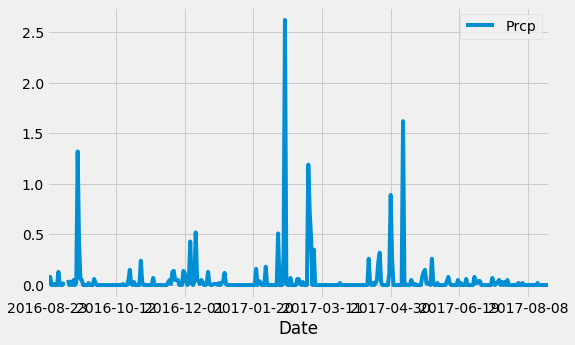

In [14]:
#Ploting the results using the Dataframe plot method

fig, ax = plt.subplots(figsize = (8, 5));
Last12_df.plot(ax = ax, x_compat = True)


In [15]:
#Use Pandas to print the summary statistics for the precipitation data
prcp_stats = Last12_df.describe()
prcp_stats

,Prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Station Analysis

In [16]:
#Design a query to calculate the total number of stations
total_stations = session.query(Station.station).count()
total_stations

9

In [18]:
#Design a query to find the most active stations by decending order
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
most_active = active_stations[0][0]

In [24]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
tobs_12 = session.query(Measurement.tobs).filter(Measurement.date >= "2016-08-23", Measurement.station == most_active).all()
    

In [26]:
tobs_df = pd.DataFrame(tobs_12)
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


In [ ]:
plt.hist(tobs_df["tobs"], bins=12)

plt.show()

# CLIMATE APP

In [29]:
def calc_temps(start_date, end_date):
     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


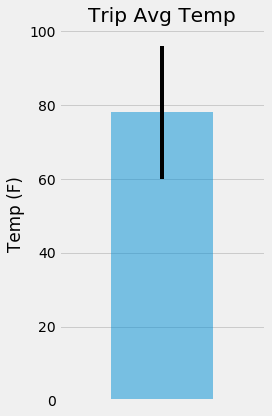

In [31]:
trip = calc_temps('2017-07-01','2017-07-14')
trip

trip_temp_df = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])


# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_temp_df.plot.bar(y='tavg', yerr=(trip_temp_df['tmax'] - trip_temp_df['tmin']), title='Trip Avg Temp', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.show()